# Analysing the eigen values

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(os.path.join("data", "train_eigen_values.tsv.gz"), sep="\t")

In [3]:
train_data.head()

,cell_codes,targets,eigen_value_0000,eigen_value_0001,eigen_value_0002,eigen_value_0003,eigen_value_0004,eigen_value_0005,eigen_value_0006,eigen_value_0007,...,eigen_value_1990,eigen_value_1991,eigen_value_1992,eigen_value_1993,eigen_value_1994,eigen_value_1995,eigen_value_1996,eigen_value_1997,eigen_value_1998,eigen_value_1999
0,OaJHcDs2kh,adrenoceptor,-673.376005,226.999512,19.856234,103.444984,0.996551,12.435002,-34.196611,50.171730,...,0.256675,0.036327,-1.371034,0.522680,0.451433,0.410545,0.766067,-0.489929,-1.232571,-0.181984
1,nwLFF4l070,adrenoceptor,-353.281628,67.610234,40.509354,36.968020,-117.899643,-15.106895,26.007932,16.742913,...,3.430432,3.290681,-0.196751,-3.199812,-1.804525,0.431745,0.362372,-1.270252,0.900353,0.634628
2,JU4SIplWZ7,adrenoceptor,-453.525170,-20.210653,-8.798432,-114.629762,23.357298,-69.579370,183.690544,91.272990,...,0.428241,2.698377,-1.660676,-2.651767,-0.562801,0.601309,-0.641914,1.162770,1.232496,0.530883
3,pqkTwaHa2L,adrenoceptor,-109.195103,-450.929925,10.205896,-232.571440,145.289635,-88.680688,-93.271277,51.418426,...,2.666084,5.704673,0.720760,-3.524865,-0.374867,2.277353,-7.823618,-0.688071,3.111128,0.099316
4,pB2BlQoW94,adrenoceptor,-559.953099,-13.435366,47.596790,64.147829,124.439161,41.770136,-94.237554,11.198108,...,-1.652867,-0.345678,-1.024346,-1.980020,-1.001250,0.668047,1.713858,0.389432,-0.276629,-0.442717


## Scatter plot of the first 2 dimensions

In [4]:
all_targets = train_data.targets.unique()

colormap = plt.get_cmap('tab20')
targets_mapping = {}
for idx, target in enumerate(all_targets):
    targets_mapping[target] = idx

color = train_data.targets.replace(targets_mapping).to_numpy()

No handles with labels found to put in legend.


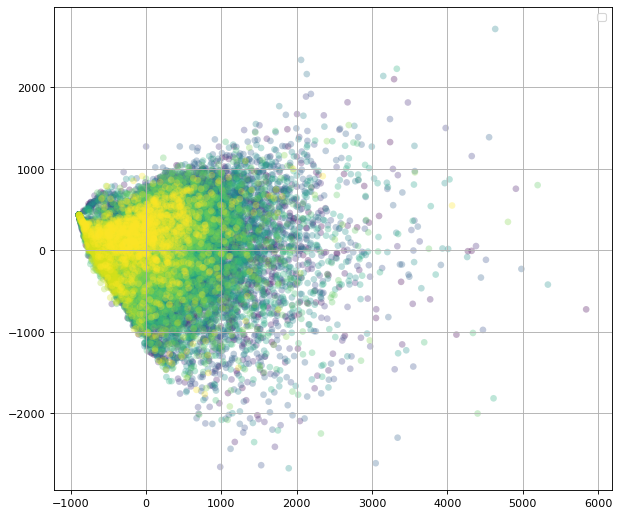

In [5]:
x = train_data.eigen_value_0000.to_numpy()
y = train_data.eigen_value_0001.to_numpy()

fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

ax.scatter(x, y, c=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

No handles with labels found to put in legend.


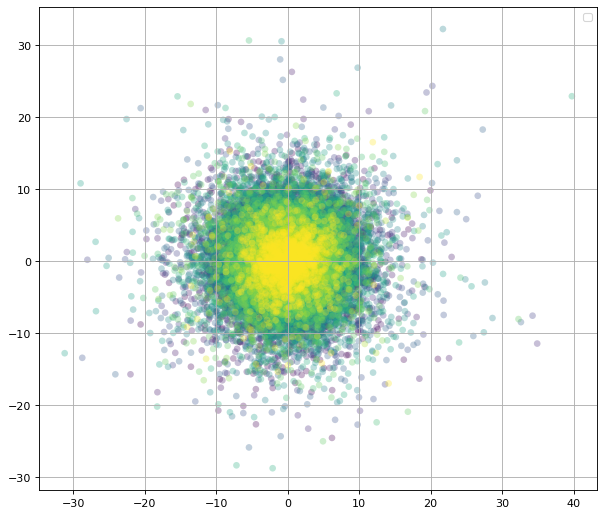

In [6]:
x = train_data.eigen_value_1537.to_numpy()
y = train_data.eigen_value_1584.to_numpy()

fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

ax.scatter(x, y, c=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

No handles with labels found to put in legend.


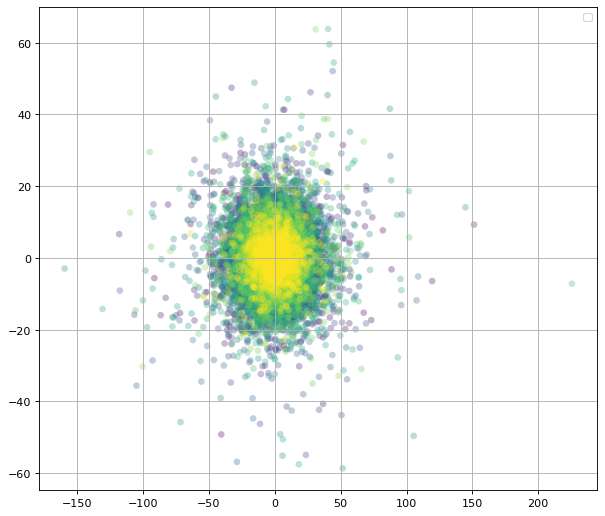

In [7]:
x = train_data.eigen_value_0412.to_numpy()
y = train_data.eigen_value_0958.to_numpy()

fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

ax.scatter(x, y, c=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

# F-test
The f-test (ANOVA) calculates if all classes have the same mean value

In [73]:
from sklearn.feature_selection import f_classif

minimum_p = 0.0005

fvalues, pvalues = f_classif(train_data.drop(columns=['cell_codes', 'targets']), train_data.targets)
independed_eigen = np.where(pvalues < minimum_p)[0]
print(independed_eigen)

[  0   1   4   5   8  10  12  20  22  24  25  31  32  33  34  40  41  42
  43  52  53  54  56  73  74  75  76  79  80 119 120 192 295]


In [74]:
train_data[['cell_codes', 'targets'] + [f"eigen_value_{str(i).zfill(4)}" for i in independed_eigen]]

,cell_codes,targets,eigen_value_0000,eigen_value_0001,eigen_value_0004,eigen_value_0005,eigen_value_0008,eigen_value_0010,eigen_value_0012,eigen_value_0020,...,eigen_value_0073,eigen_value_0074,eigen_value_0075,eigen_value_0076,eigen_value_0079,eigen_value_0080,eigen_value_0119,eigen_value_0120,eigen_value_0192,eigen_value_0295
0,OaJHcDs2kh,adrenoceptor,-673.376005,226.999512,0.996551,12.435002,-53.292042,-86.367871,18.066333,-9.157258,...,7.482442,-10.162268,-8.608781,6.635719,9.185821,5.313838,14.017875,2.453663,0.584056,2.168780
1,nwLFF4l070,adrenoceptor,-353.281628,67.610234,-117.899643,-15.106895,58.830147,-12.234011,9.778414,-1.611198,...,-30.397692,27.740527,14.900385,-29.935619,24.108254,-5.796626,11.474354,-13.491016,4.723971,10.421626
2,JU4SIplWZ7,adrenoceptor,-453.525170,-20.210653,23.357298,-69.579370,-17.330733,132.700391,78.389535,-28.028080,...,27.865713,1.706785,2.011343,-3.276382,-16.046232,1.385838,-9.505797,-6.065491,9.535981,-0.844177
3,pqkTwaHa2L,adrenoceptor,-109.195103,-450.929925,145.289635,-88.680688,80.553797,-169.032423,0.278556,-35.811080,...,-47.250200,14.980502,75.389083,-42.465722,-1.916221,27.095390,-15.521747,17.552051,18.349489,-17.474411
4,pB2BlQoW94,adrenoceptor,-559.953099,-13.435366,124.439161,41.770136,-1.057807,-110.285661,-30.248295,0.214631,...,2.003944,-4.649287,10.904717,6.796473,8.605184,17.161763,-0.103206,7.902818,-10.105551,2.254663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46135,dYkkFICrCL,eNOS,-195.222544,-42.641902,-102.532098,-13.073140,56.189645,114.202360,-33.274303,17.332477,...,8.833579,-46.880572,-32.323475,7.205796,28.931361,1.602228,4.304812,-2.236162,0.598824,0.599072
46136,ldJIjn7Xtr,eNOS,502.118319,307.506208,-102.562038,185.735193,-48.835956,-56.735683,-133.627032,-46.534023,...,59.612173,-15.983137,24.487070,11.234949,111.957558,18.543616,8.854025,1.283826,-0.190108,11.237885
46137,ES8E2pYU3W,eNOS,-622.064968,283.318660,-122.613949,-255.511300,-91.526901,23.225541,34.788392,3.156379,...,-9.295632,-8.735299,7.788041,23.854329,-23.576284,-13.428361,1.665942,16.157852,16.638780,-6.625661
46138,BTIiZWoIBA,eNOS,-673.005814,178.225912,-43.125986,-221.375231,-72.502165,100.918443,52.184741,-51.231954,...,24.143755,15.160528,-3.368836,4.082381,-16.062178,11.743789,-19.674481,-12.630428,4.999117,6.031657
